In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt


In [26]:
data = pd.read_csv(r"..\datasets\ObesityDataSet_raw_and_data_sinthetic.csv")
print(data)

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

In [27]:
data.isnull().any()

Gender                            False
Age                               False
Height                            False
Weight                            False
family_history_with_overweight    False
FAVC                              False
FCVC                              False
NCP                               False
CAEC                              False
SMOKE                             False
CH2O                              False
SCC                               False
FAF                               False
TUE                               False
CALC                              False
MTRANS                            False
NObeyesdad                        False
dtype: bool

In [28]:
X = data.drop("NObeyesdad", axis=1)
X.rename(inplace=True, columns={"family_history_with_overweight": "fam_with_ow"})
cat_cols = X.select_dtypes(include=["object"]).columns
print(cat_cols)


Index(['Gender', 'fam_with_ow', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
       'MTRANS'],
      dtype='object')


In [29]:
Y = data["NObeyesdad"].to_frame()
Y.rename(inplace=True, columns={"NObeyesdad": "obesity_enc"})

ord_enc = OrdinalEncoder()
X[cat_cols] = ord_enc.fit_transform(X[cat_cols])
X.head(25)


,Gender,Age,Height,Weight,fam_with_ow,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,0.0,1.0,3.0,3.0
1,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,2.0,1.0,3.0,1.0,3.0,0.0,2.0,3.0
2,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,2.0,1.0,1.0,3.0
3,1.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,2.0,0.0,2.0,0.0,2.0,0.0,1.0,4.0
4,1.0,22.0,1.78,89.8,0.0,0.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,3.0
5,1.0,29.0,1.62,53.0,0.0,1.0,2.0,3.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0
6,0.0,23.0,1.50,55.0,1.0,1.0,3.0,3.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,2.0
7,1.0,22.0,1.64,53.0,0.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,3.0,0.0,2.0,3.0
8,1.0,24.0,1.78,64.0,1.0,1.0,3.0,3.0,2.0,0.0,2.0,0.0,1.0,1.0,1.0,3.0
9,1.0,22.0,1.72,68.0,1.0,1.0,2.0,3.0,2.0,0.0,2.0,0.0,1.0,1.0,3.0,3.0


In [30]:
# Y["obesity"] = Y["obesity_enc"]
ord_enc = LabelEncoder()
ord_test = ord_enc.fit(Y["obesity_enc"])
print(ord_test.classes_)

# Y["obesity_enc"] = ord_test
Y.head(25)

['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


,obesity_enc
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
5,Normal_Weight
6,Normal_Weight
7,Normal_Weight
8,Normal_Weight
9,Normal_Weight


7
                   actual            predicted
544   Insufficient_Weight  Insufficient_Weight
1987     Obesity_Type_III     Obesity_Type_III
420   Insufficient_Weight  Insufficient_Weight
527   Insufficient_Weight  Insufficient_Weight
196         Normal_Weight        Normal_Weight
...                   ...                  ...
331         Normal_Weight  Insufficient_Weight
194        Obesity_Type_I        Normal_Weight
322   Insufficient_Weight        Normal_Weight
266   Insufficient_Weight        Normal_Weight
1567      Obesity_Type_II      Obesity_Type_II

[528 rows x 2 columns]
[0.96401515 0.94128788 0.9601518 ]
[[195   9   0   0   0   0   0]
 [  5 194   0   0   0   8   2]
 [  0   0 250   0   0   2   5]
 [  0   1   0 220   1   0   0]
 [  0   0   0   0 245   0   0]
 [  0  18   0   0   0 198   3]
 [  0   7   3   0   0   7 210]]
0 Insufficient_Weight
1 Normal_Weight
2 Obesity_Type_I
3 Obesity_Type_II
4 Obesity_Type_III
5 Overweight_Level_I
6 Overweight_Level_II


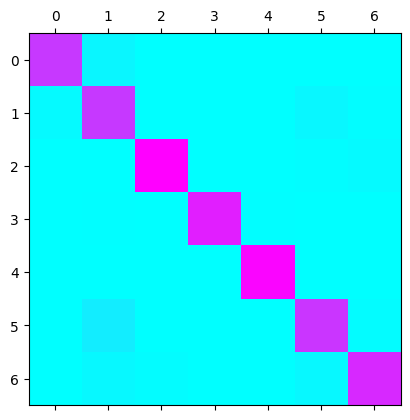

{'n_estimators': 180, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': False}


In [31]:
clf = RandomForestClassifier(max_depth=3, random_state=0)

random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['log2', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

n_samples, n_features = X.shape
n_classes = len(Y["obesity_enc"].unique())
print(n_classes)

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.25,
    random_state=42,
)

clf = RandomizedSearchCV(clf, random_grid, random_state=0)
clf.fit(X_train, Y_train.values.ravel())
grid = clf.best_params_
clf = clf.best_estimator_

test_df = pd.DataFrame()
test_df["actual"] = Y_test
test_df["predicted"] = clf.predict(X_test)
print(test_df)

scores = cross_val_score(clf, X_train, Y_train.values.ravel(), cv=3, scoring=None)
print(scores)

Y_train_pred = cross_val_predict(clf, X_train, Y_train.values.ravel(), cv=3)
f1 = f1_score(Y_train, Y_train_pred, average='micro')
conf_m = confusion_matrix(Y_train, Y_train_pred)
print(conf_m)
for i, iclass in enumerate(ord_test.classes_):
    print(i, iclass)
    
plt.matshow(conf_m, cmap=plt.cm.cool)
plt.show()
print(grid)

